<h1>Pre Precessing study of stock data</h1>

<h2>Author: Danilo Filippo Reiszel Pereira</h2>
<h4>Univesidade Federal do Rio de Janeiro</h4>

<h2>Libraries imports</h2>

In [1]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.externals import joblib

%matplotlib inline

<h3>Overall Params</h3>

In [2]:
asset = 'PETR4'

MLPtrainPath = 'MLP/residuals/PETR4/Variables/PETR4_MLP_fitHistory_40x1x1_norm_mapminmax.pkl'
SAEtrainPath = 'StackedAutoEncoder/residuals/PETR4/Variables/PETR4_SAE_40x30x20x10x1_norm_mapminmax.pkl'

saveDir = '/home/danilofrp/projeto_final/results/preprocessing/trains'
if not os.path.exists(saveDir):
    os.makedirs(saveDir)

plt.rcParams['font.weight'] = 'bold'
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

In [4]:
MLPhist = joblib.load(MLPtrainPath)
SAEhist = joblib.load(SAEtrainPath)

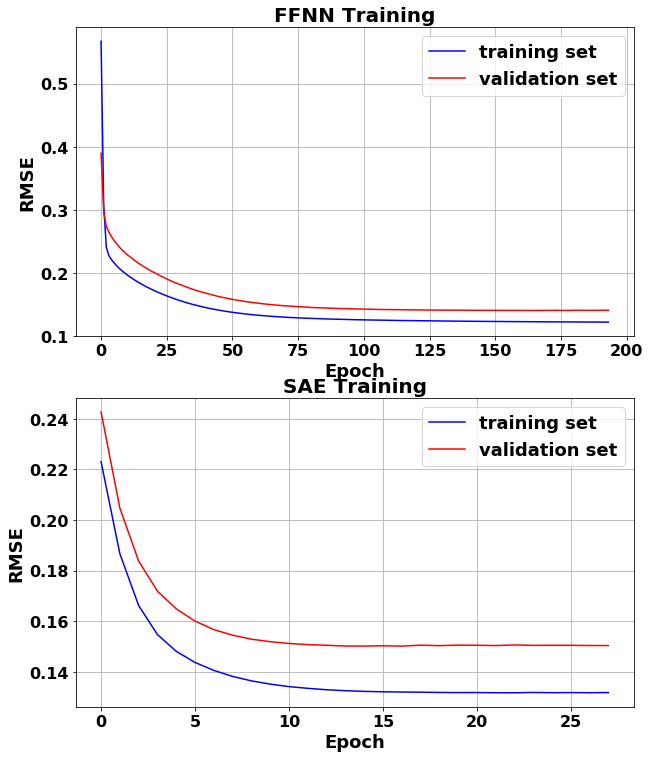

In [6]:
fig, ax = plt.subplots(figsize = (10,12.5), nrows = 2, ncols = 1)

ax[0].set_title('FFNN Training')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('RMSE')
ax[0].grid()
trainingSet, = ax[0].plot(np.sqrt(MLPhist['loss']), 'b', label = 'training set')
validationSet, = ax[0].plot(np.sqrt(MLPhist['val_loss']), 'r', label = 'validation set')
ax[0].legend(handles=[trainingSet, validationSet], labels=['training set', 'validation set'], prop={'size': 18})

ax[1].set_title('SAE Training')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('RMSE')
ax[1].grid()
trainingSet, = ax[1].plot(np.sqrt(SAEhist['loss']), 'b', label = 'training set')
validationSet, = ax[1].plot(np.sqrt(SAEhist['val_loss']), 'r', label = 'validation set')
ax[1].legend(handles=[trainingSet, validationSet], labels=['training set', 'validation set'], prop={'size': 18})

#plt.figtext(0.5,  0.010, 'Lowest Validation RMSE: {:.5f}'.format(np.sqrt(min(bestStdFitHistory['val_loss']))), size = 18, horizontalalignment = 'center')
#fig.savefig('{}/{}_MLP_fitHistory_{}x{}x1_norm_mapstd.pdf'.format(saveFigDir, asset, inputDim, bestStdHiddenLayer), bbox_inches='tight')

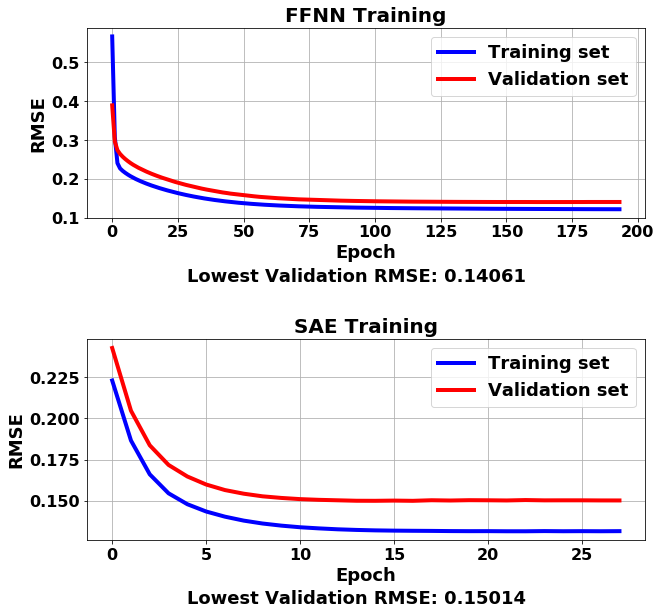

In [7]:
linewidth = 4.0
plt.figure(figsize=(10,8))

gs1 = gridspec.GridSpec(1, 1)
gs1.update(top=1, bottom=0.67)
ax1 = plt.subplot(gs1[0, :])
ax1.set_title('FFNN Training')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('RMSE')
ax1.grid()
ax1.plot(np.sqrt(MLPhist['loss']), 'b', label = 'Training set', linewidth = linewidth)
ax1.plot(np.sqrt(MLPhist['val_loss']), 'r', label = 'Validation set', linewidth = linewidth)
ax1.legend(prop={'size': 18})
plt.figtext(0.5,  0.56, 'Lowest Validation RMSE: {:.5f}'.format(np.sqrt(min(MLPhist['val_loss']))), size = 18, horizontalalignment = 'center')

gs2 = gridspec.GridSpec(1, 1)
gs2.update(top=0.46, bottom=0.11)
ax2 = plt.subplot(gs2[0, :])
ax2.set_title('SAE Training')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('RMSE')
ax2.grid()
ax2.plot(np.sqrt(SAEhist['loss']), 'b', label = 'Training set', linewidth = linewidth)
ax2.plot(np.sqrt(SAEhist['val_loss']), 'r', label = 'Validation set', linewidth = linewidth)
ax2.legend(prop={'size': 18})
plt.figtext(0.5,  0.00, 'Lowest Validation RMSE: {:.5f}'.format(np.sqrt(min(SAEhist['val_loss']))), size = 18, horizontalalignment = 'center')

plt.savefig('{}/WCCI_{}_fitHistory.pdf'.format(saveDir, asset), bbox_inches='tight')